In [61]:
#https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/code?datasetId=4538&sortBy=voteCount

#https://www.kaggle.com/code/janiobachmann/s-p-500-time-series-forecasting-with-prophet

#https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm

#https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python

#https://www.kaggle.com/code/shreyasajal/pytorch-forecasting-for-time-series-forecasting

In [62]:
!pip install -q yfinance

In [63]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [64]:
yf


<module 'yfinance' from '/opt/conda/lib/python3.7/site-packages/yfinance/__init__.py'>

In [65]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','TSLA']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN, TSLA]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","TESLA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-03-06,198.539993,198.600006,192.300003,193.809998,193.809998,128100100,TESLA
2023-03-07,191.380005,194.199997,186.100006,187.710007,187.710007,148125800,TESLA
2023-03-08,185.039993,186.500000,180.000000,182.000000,182.000000,151897800,TESLA
2023-03-09,180.250000,185.179993,172.509995,172.919998,172.919998,170023800,TESLA
2023-03-10,175.130005,178.289993,168.440002,173.440002,173.440002,191007900,TESLA
2023-03-13,167.460007,177.350006,163.910004,174.479996,174.479996,167790300,TESLA
2023-03-14,177.309998,183.800003,177.139999,183.259995,183.259995,143717900,TESLA
2023-03-15,180.800003,182.339996,176.029999,180.449997,180.449997,145995600,TESLA
2023-03-16,180.369995,185.809998,178.839996,184.130005,184.130005,121136800,TESLA


In [66]:
df.sample(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800,TESLA
2022-10-14,224.009995,226.259995,204.160004,204.990005,204.990005,94124500,TESLA
2022-10-20,235.770004,241.309998,234.869995,236.149994,234.897995,21811000,MICROSOFT
2022-12-01,148.210007,149.130005,146.610001,148.309998,148.083893,71250400,APPLE
2022-04-22,281.679993,283.200012,273.380005,274.029999,271.367767,29405800,MICROSOFT
2022-07-25,108.879997,110.580002,107.010002,108.209999,108.209999,28289900,GOOGLE
2022-07-20,151.119995,153.720001,150.369995,153.039993,152.342010,64823400,APPLE
2022-04-18,329.676666,338.306671,324.470001,334.763336,334.763336,51715200,TESLA
2022-11-30,182.429993,194.759995,180.630005,194.699997,194.699997,109186400,TESLA


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1250 entries, 2022-03-21 to 2023-03-17
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1250 non-null   float64
 1   High          1250 non-null   float64
 2   Low           1250 non-null   float64
 3   Close         1250 non-null   float64
 4   Adj Close     1250 non-null   float64
 5   Volume        1250 non-null   int64  
 6   company_name  1250 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.1+ KB


In [68]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1.250000e+03
mean,172.967517,175.899954,169.947594,172.918717,172.536604,6.457980e+07
std,70.383226,71.601505,68.945963,70.215596,69.861279,4.241194e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,8.567800e+06
25%,113.557503,115.737753,111.865749,113.692499,113.692499,2.962680e+07
50%,148.720001,150.760002,147.024994,148.875000,148.561256,5.815275e+07
75%,239.994999,243.785004,235.482502,240.302502,239.705597,8.413265e+07
max,378.766663,384.290009,362.433319,381.816681,381.816681,3.065906e+08


In [69]:
TSLA.describe()
#We have only 255 records in one year because weekends are not included in the data.

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,235.408546,241.138680,228.944934,234.837747,234.837747,1.080972e+08
std,63.085559,63.979007,61.906808,62.725632,62.725632,4.975553e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,190.930000,195.769997,185.747501,190.912495,190.912495,7.195425e+07
50%,232.223335,238.985001,224.683334,232.831665,232.831665,9.214500e+07
75%,289.029991,295.099998,280.465012,288.150009,288.150009,1.389887e+08
max,378.766663,384.290009,362.433319,381.816681,381.816681,3.065906e+08


<Figure size 1500x1000 with 0 Axes>

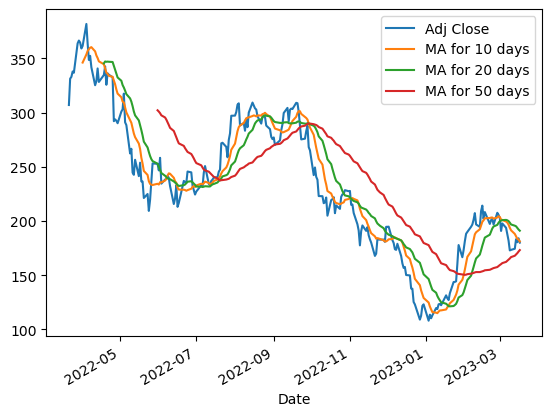

In [70]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
#fig.set_title('TESLA')

fig.tight_layout()

In [71]:
# prediction

# Get the stock quote
df = pdr.get_data_yahoo('AMZN', start='2018-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000
...,...,...,...,...,...,...
2023-03-13,89.970001,94.019997,88.120003,92.430000,92.430000,72397100
2023-03-14,93.830002,95.070000,92.709999,94.879997,94.879997,60912700
2023-03-15,93.220001,96.669998,93.070000,96.199997,96.199997,70731800


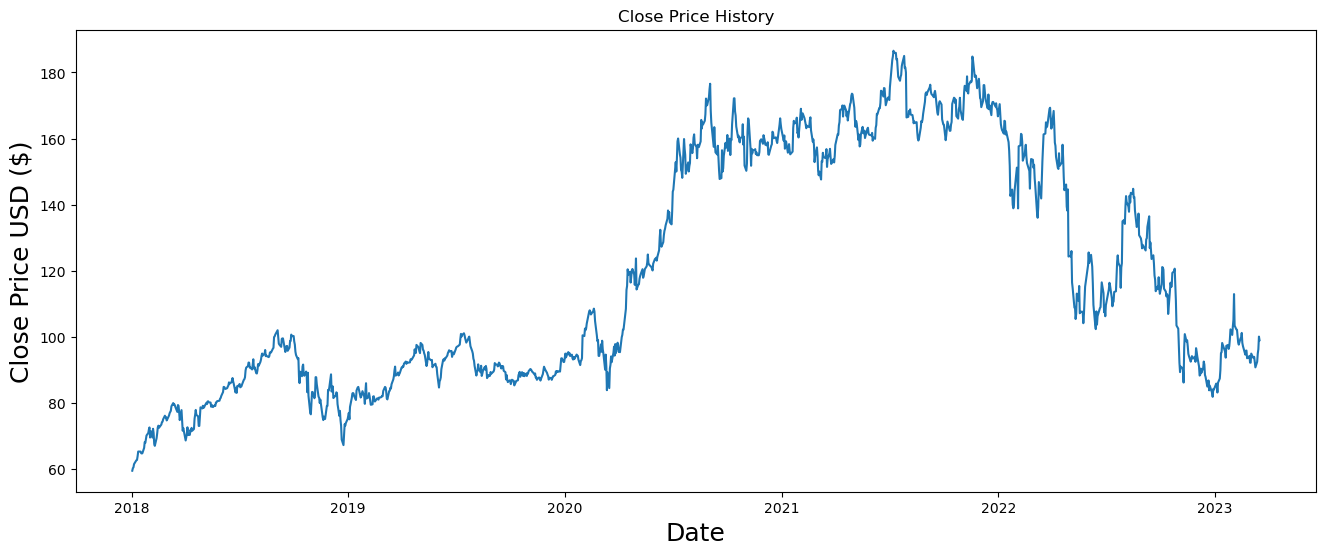

In [72]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [73]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1246

In [74]:
data.head()

,Close
Date,
2018-01-02,59.450500
2018-01-03,60.209999
2018-01-04,60.479500
2018-01-05,61.457001
2018-01-08,62.343498


In [75]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.00597466],
       [0.00809471],
       ...,
       [0.28909297],
       [0.31930068],
       [0.31072607]])

In [76]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.        , 0.00597466, 0.00809471, 0.0157843 , 0.02275801,
       0.02505112, 0.02569225, 0.03448316, 0.04570093, 0.04556715,
       0.04168895, 0.04102816, 0.04152373, 0.05439743, 0.0682544 ,
       0.06627599, 0.0743156 , 0.08379485, 0.08994259, 0.09786421,
       0.10300505, 0.07905522, 0.0947687 , 0.07905522, 0.09983872,
       0.08958855, 0.06351873, 0.05923146, 0.07757238, 0.08869574,
       0.10306795, 0.1072805 , 0.10213972, 0.10987259, 0.1156034 ,
       0.11655521, 0.12232143, 0.13095503, 0.1270335 , 0.12721836,
       0.11974513, 0.12241974, 0.1316079 , 0.13712637, 0.14002124,
       0.1427195 , 0.1533512 , 0.1610211 , 0.15700517, 0.15811441,
       0.15470026, 0.15051526, 0.13999369, 0.15634834, 0.15451937,
       0.13998979, 0.12057505, 0.14429279, 0.12116112, 0.09534691])]
[0.10160869078816598]

[array([0.        , 0.00597466, 0.00809471, 0.0157843 , 0.02275801,
       0.02505112, 0.02569225, 0.03448316, 0.04570093, 0.04556715,
       0.04168895, 0.04102816, 0.04

In [77]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1186/1186 [==============================] - 44s 34ms/step - loss: 0.0040


In [78]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3/3 [==============================] - 1s 28ms/step


3.620449914585896

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


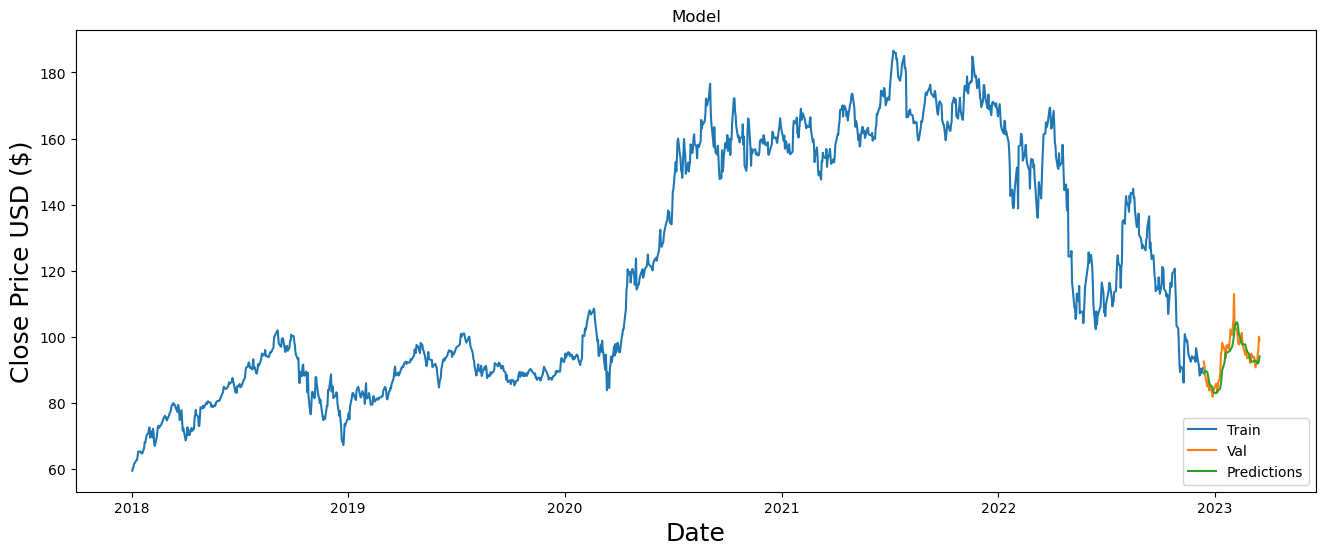

In [79]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# ARIMA

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1311
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4401.637
Date:                Sun, 19 Mar 2023   AIC                           8815.275
Time:                        12:24:34   BIC                           8846.341
Sample:                             0   HQIC                          8826.927
                               - 1311                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0391      0.019     -2.038      0.042      -0.077      -0.001
ar.L2          0.0128      0.016      0.783      0.434      -0.019       0.045
ar.L3          0.0063      0.021      0.298      0.7

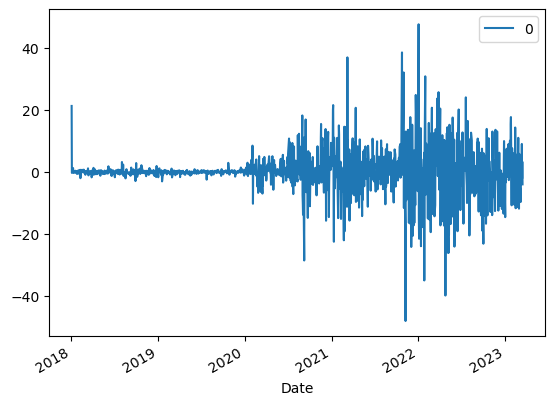

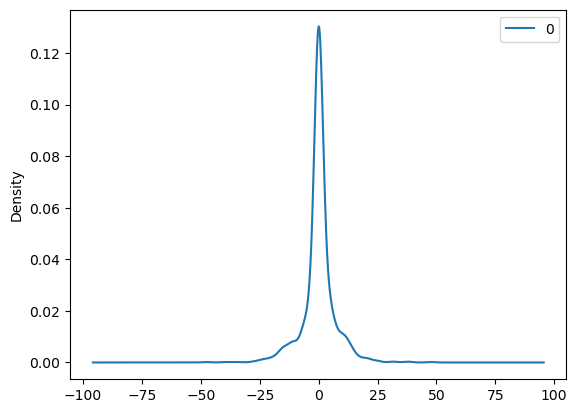

                 0
count  1311.000000
mean      0.135061
std       6.989976
min     -48.014014
25%      -1.035474
50%       0.069438
75%       1.648040
max      47.714561


In [80]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA (series, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print (residuals.describe())

In [81]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

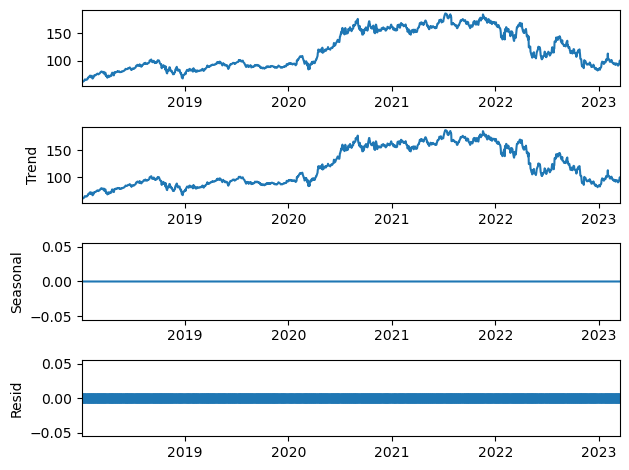

In [82]:
series = data
result = seasonal_decompose(series, model='additive',period=1) # The frequncy is daily
figure = result.plot()